In [1]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import multiprocessing
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from os import listdir
from tqdm.auto import tqdm
tqdm.pandas()

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
corpus = "dados/corpus_tratado/single/corpus_tratado.txt"
model = Word2Vec(LineSentence(corpus), size=100, window=5,                 
                 min_count=5, sg=1, hs=1, iter=10, workers=multiprocessing.cpu_count(), sample = 0.00001)

In [3]:
print(model)

Word2Vec(vocab=39717, size=100, alpha=0.025)


In [46]:
words = list(model.wv.vocab)
model.save("modelos/w2v_jur.model")

In [5]:
l = ['homem', 'mulher', 'desembargador', 'desembargadora', 'salário', 'pagamento', 'dinheiro']
X = model[l]
dic = {k:model.wv.vocab[k] for k in set(model.wv.vocab).intersection(l)}
dic

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


{'pagamento': <gensim.models.keyedvectors.Vocab at 0x2106a736a08>,
 'desembargadora': <gensim.models.keyedvectors.Vocab at 0x2106b0ab7c8>,
 'dinheiro': <gensim.models.keyedvectors.Vocab at 0x2106a7c7f88>,
 'desembargador': <gensim.models.keyedvectors.Vocab at 0x2106a803608>,
 'mulher': <gensim.models.keyedvectors.Vocab at 0x2106a86c608>,
 'salário': <gensim.models.keyedvectors.Vocab at 0x2106a781908>,
 'homem': <gensim.models.keyedvectors.Vocab at 0x2106a86c5c8>}

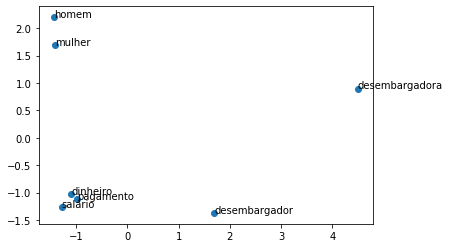

In [6]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(l):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [41]:
model.wv.similar_by_word('marcelo', topn=100)

[('rodrigo', 0.740486204624176),
 ('plastno', 0.7209423780441284),
 ('gomes', 0.7189576625823975),
 ('daniel', 0.7183153629302979),
 ('avilla', 0.7182043194770813),
 ('alexandra', 0.7131903171539307),
 ('antonio', 0.7095996141433716),
 ('mantilla', 0.7090675830841064),
 ('catapani', 0.7085869312286377),
 ('heloiza', 0.704072117805481),
 ('gesley', 0.7031880617141724),
 ('sandro', 0.7027162909507751),
 ('heiras', 0.6997817754745483),
 ('vixe', 0.6993074417114258),
 ('kästner', 0.6982036828994751),
 ('oliveira', 0.6955467462539673),
 ('coubói', 0.695537805557251),
 ('plastino', 0.6942404508590698),
 ('assessorá-lo', 0.6935888528823853),
 ('golmia', 0.6896857023239136),
 ('walter', 0.6880980134010315),
 ('franzini', 0.6880567073822021),
 ('martinsferreira', 0.6856468915939331),
 ('fontanezi', 0.6849033832550049),
 ('marilea', 0.6846143007278442),
 ('sanita', 0.6838554739952087),
 ('scarpin', 0.6835078597068787),
 ('jusciley', 0.6833661794662476),
 ('gardin', 0.6830035448074341),
 ('backes

In [ ]:
model.wv.similar_by_vector((model['inquérito'] + model['administrativo'])/2, topn=100)

In [ ]:
stopwords.words('portuguese')

In [42]:
(model['juiz'] + model['administrativa'])/2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.22440654,  0.02982402, -0.11136705, -0.06795362, -0.06224841,
       -0.37790564,  0.12705891, -0.21431443, -0.16176209,  0.12632868,
        0.02940534,  0.40972397, -0.18543856, -0.12650499,  0.301375  ,
        0.07625581, -0.12886643,  0.24217989, -0.18078662, -0.0371567 ,
        0.24038248,  0.04001826,  0.18705499, -0.07399853,  0.3324826 ,
       -0.14357741, -0.05287638,  0.42629462, -0.38504136,  0.01041055,
       -0.03255651, -0.12201974,  0.41604468, -0.00956087,  0.27033526,
       -0.04832914, -0.04318316, -0.1495626 , -0.53328645, -0.07166006,
       -0.07311621, -0.02621359, -0.20827189,  0.134988  , -0.30662256,
       -0.01503565, -0.09069635,  0.21374694,  0.15086295,  0.6915364 ,
       -0.06190272,  0.20597172, -0.27286518, -0.15512179,  0.05176589,
       -0.09029895,  0.15876578, -0.1642959 , -0.24876095,  0.16428964,
       -0.046267  ,  0.22962663, -0.3111919 , -0.01826023, -0.27253157,
        0.11262142, -0.3207784 , -0.5082788 , -0.18593879,  0.22